## Chuẩn bị giải nén dữ liệu từ Names.zip

In [39]:
!pip install tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm
import gc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [8]:
paths = glob('./Names_2/*.txt')
li_df = []
For path in path
for path in tqdm(paths):
    df = pd.read_csv(path, names=['names', 'gender', 'occurence'])
    df['year'] = path[-8:-4]
    li_df.append(df)
    
df = pd.concat(li_df, ignore_index=True)
del li_df
gc.collect()

100%|██████████| 139/139 [00:01<00:00, 92.19it/s] 


26

In [10]:
df = df.set_index('year').reset_index()
gc.collect()

22

In [9]:
df.head(2)

,names,gender,occurence,year
0,Emily,F,25956,2000
1,Hannah,F,23082,2000


## 1. VẼ BIỂU ĐỒ TRẺ EM SINH RA THEO GIỚI TÍNH VÀ NĂM

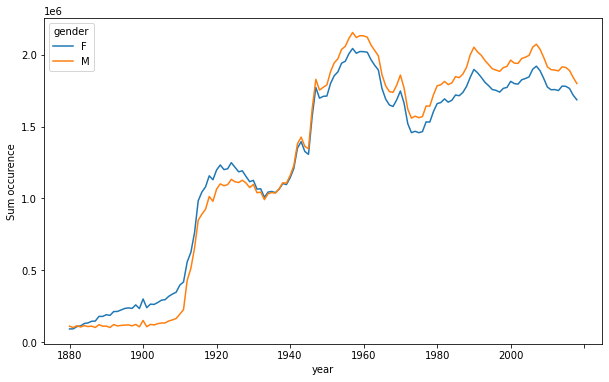

In [16]:
df.groupby(['gender', 'year']).sum().reset_index().\
pivot(index='year', columns='gender', values='occurence').\
plot(figsize=(10, 6), ylabel='Sum occurence');


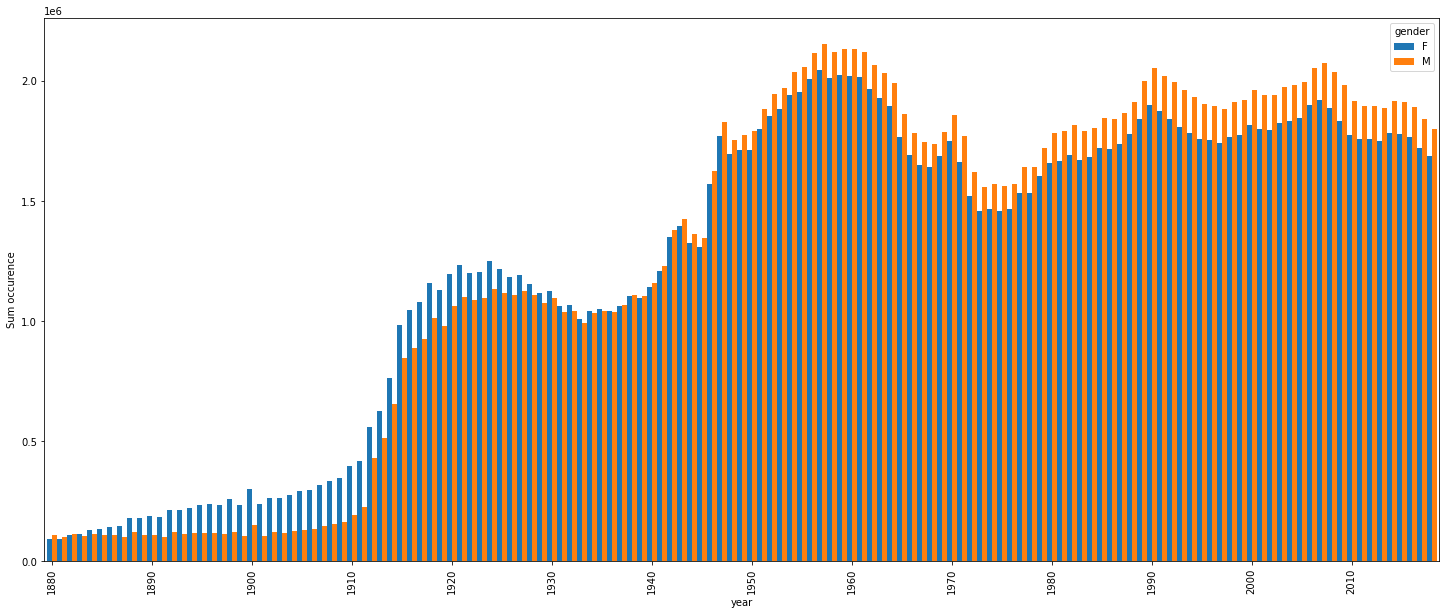

In [33]:
ax = df.groupby(['gender', 'year']).sum().reset_index().\
pivot(index='year', columns='gender', values='occurence').\
plot(kind='bar', figsize=(25, 10), ylabel='Sum occurence', width=1)
ax.xaxis.set_major_locator(MultipleLocator(10));

## 2. TẠO SUBSET GỒM 1000 TÊN PHỔ BIẾN MỖI NĂM THEO TỪNG LOẠI GIỚI TÍNH

In [43]:
df.groupby(['year', 'gender']).apply(lambda x: x.nlargest(1000, 'occurence'))[['names', 'occurence']].\
droplevel(2)

#Cách khác:
#data_name=df.set_index('names')
#data_name.groupby(['year', 'gender']).occurence.nlargest(1000)

names  occurence
year gender                      
1880 F            Mary       7065
     F            Anna       2604
     F            Emma       2003
     F       Elizabeth       1939
     F          Minnie       1746
...                ...        ...
2018 M          Korbyn        207
     M         Randall        207
     M          Benton        206
     M         Coleman        206
     M          Markus        206

[277877 rows x 2 columns]

## 3. SỐ LƯỢNG CÁC BÉ SINH THEO NĂM CÓ TÊN: PHILIP, HARY, ELIZABETH, MARILYN

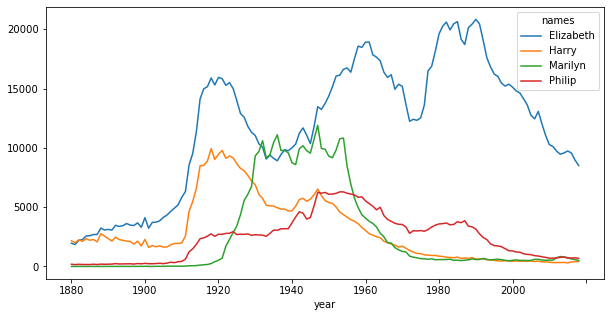

In [52]:
names = ["Philip", "Harry", "Elizabeth", "Marilyn"]
df.query("names in @names").groupby(['year', 'names']).sum().reset_index(). \
pivot(index='year', columns='names', values='occurence').fillna(0).plot(figsize=(10, 5));

## 4. VẼ BIỂU ĐỒ THỂ HIỆN SỰ ĐANG DẠNG TRONG VIỆC ĐẶT TÊN THEO CÁC NĂM TRONG TỪNG GIỚI TÍNH (THỂ HIỆN BẰNG XU HƯỚNG GIẢM DẦN THEO TỪNG NĂM % top 1000 phổ biến)

In [60]:
top_1000 = df.groupby(['year', 'gender']).apply(lambda x : x.nlargest(1000, 'occurence', keep='all'))[['names', 'occurence']].droplevel(2). \
reset_index().groupby(['year', 'gender']).occurence.sum()

all_df = df.groupby(['year', 'gender']).occurence.sum()
top_1000

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1584754
2017  F         1274098
      M         1536814
2018  F         1251608
      M         1493831
Name: occurence, Length: 278, dtype: int64

In [64]:
all_df

year  gender
1880  F           90994
      M          110490
1881  F           91953
      M          100743
1882  F          107847
                 ...   
2016  M         1891585
2017  F         1719138
      M         1842837
2018  F         1686961
      M         1800392
Name: occurence, Length: 278, dtype: int64

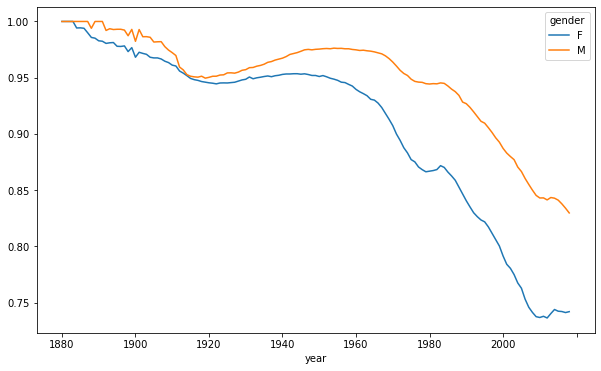

In [65]:
(top_1000 / all_df).to_frame().reset_index().pivot(index='year', columns='gender', values='occurence').plot(figsize=(10, 6));

### 5 .VẼ BIỂU ĐỒ THỂ HIỆN SỰ THAY ĐỔI TRONG CÁCH ĐẶT CHỮ CÁI ĐẦU TIÊN TRONG TÊN NAM, NỮ TRONG CÁC NĂM 1900, 1960 và 2018

In [74]:
years = ['1900', '1960', '2018']
df_3_years = df.query('year in @years')
df_3_years['first_letter'] = df_3_years.names.apply(lambda x : x[0])

/opt/anaconda3/envs/chris/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
gender_df = df_3_years.groupby(['year', 'gender', 'first_letter']).occurence.sum().to_frame()
male_df = gender_df.query("gender = 'M'")
female_df = gender_df.query("gender = 'F'")

fig, ax = plt.subplots(2, 1, figsize=(20, 12))
male_df.pivot(index='first_letter', column='year', values='occurence').plot(kind='bar', ax=ax[0], width=0.8)
female_df.pivot(index='first_letter', column='year', values='occurence').plot(kind='bar', ax=ax[0], width=0.8)

KeyError: 'first_letter'

### 6. XAC DINH XU HUONG TEN CON TRAI BIEN THANH TEN CON GAI VA NGUOC LAI

In [77]:
male_df = df.query("gender == 'M'")
female_df = df.query("gender == 'F'")

male_to_female = male_df.query("name in @female_df.name")
female_to_male = female_df.query("name in @male_df.name")

UndefinedVariableError: name 'name' is not defined

In [79]:
male_to_female.groupby('year').occurence.sum().plot(figsize=(10, 5), label='Male to Female')
female_to_male.groupby('year').occurence.sum().plot(label='Female to Male')
plt.legend();

NameError: name 'male_to_female' is not defined

# 2. BAI SO 2

- Tung dice 100 lan
- Duoc phep di len 100 - 200 lan --> xac xuat thang cao
- 50 - 50: tung lan 1-2, bi xuong 30 ->59
- 59 di xuong, 100

In [ ]:
def is_win(category='up'):
    
    floor = 0
    num_up = 0
    
    while num_up <100  or floor < 60:
        dice = np.random.randint(1, 7)

        if dice <= 2:
            floor = max(0, floor - 1)
        elif 2 < dice <=5:
            floor += 1
            num_up += 1
        else:
            floor += np.random.randint(1, 7)
            num_up += 1
        
        if np.random.uniform() < 0.001:
            floor = 0
    
    return floor >= 60

In [ ]:
is_win()

In [ ]:
num_plays = 1000
results = []
for _in range(num_plays):
    result.append(is_win())
    
sum(results) / num_plays